## Exploratory Data Analysis on Fairface Dataset
Source: https://github.com/dchen236/FairFace/blob/master/README.md

### About Data
Images (train + validation set): [Padding=0.25](https://drive.google.com/file/d/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86/view), [Padding=1.25](https://drive.google.com/file/d/1g7qNOZz9wC7OfOhcPqH1EZ5bk1UFGmlL/view)\
- Padding =0.25 in the main experiments (less margin)
- Padding =1.25 for the bias experiments

Labels: [Train](https://drive.google.com/file/d/1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH/view), [Validation](https://drive.google.com/file/d/1wOdja-ezstMEp81tX1a-EYkFebev4h7D/view)

License: CC BY 4.0

Notes
The models and scripts were tested on a device with 8Gb GPU, it takes under 2 seconds to predict the 5 images in the test folder.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import importlib.util
import sys
import os
import io
import requests
from sklearn.preprocessing import LabelEncoder

# %pip install pandas_profiling
# %pip install typing_extensions
# from pandas_profiling import ProfileReport


#### Labels

In [ ]:
# Load the training label dataset
train_file_id = '1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH'
valid_file_id = '1wOdja-ezstMEp81tX1a-EYkFebev4h7D'
train_url = f'https://drive.google.com/uc?export=download&id={train_file_id}'
valid_url = f'https://drive.google.com/uc?export=download&id={valid_file_id}'
train_response = requests.get(train_url)
valid_response = requests.get(valid_url)
train_ds = pd.read_csv(io.StringIO(train_response.text))
valid_ds = pd.read_csv(io.StringIO(valid_response.text))
all_labels = pd.concat([train_ds, valid_ds], axis=0)
balanced_labels = all_labels.query("service_test == True")


In [ ]:
display(all_labels.info())
display(all_labels.describe())
display(all_labels.head())


<class 'pandas.core.frame.DataFrame'>
Index: 97698 entries, 0 to 10953
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          97698 non-null  object
 1   age           97698 non-null  object
 2   gender        97698 non-null  object
 3   race          97698 non-null  object
 4   service_test  97698 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 3.8+ MB


None

,file,age,gender,race,service_test
count,97698,97698,97698,97698,97698
unique,97698,9,2,7,2
top,train/1.jpg,20-29,Male,White,False
freq,1,28898,51778,18612,52284


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [ ]:
display(balanced_labels.info())
display(balanced_labels.describe())
display(balanced_labels.head())


<class 'pandas.core.frame.DataFrame'>
Index: 45414 entries, 0 to 10953
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          45414 non-null  object
 1   age           45414 non-null  object
 2   gender        45414 non-null  object
 3   race          45414 non-null  object
 4   service_test  45414 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.8+ MB


None

,file,age,gender,race,service_test
count,45414,45414,45414,45414,45414
unique,45414,9,2,7,1
top,train/1.jpg,20-29,Male,White,True
freq,1,16953,22764,6511,45414


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True
5,train/6.jpg,20-29,Male,White,True
7,train/8.jpg,30-39,Female,Indian,True


In [ ]:
# Check for missing values
all_labels.isnull().sum()


file            0
age             0
gender          0
race            0
service_test    0
dtype: int64

In [ ]:
# Drop 'file' column
train_ds = train_ds.drop(columns=['file'])


In [ ]:
all_labels.head()


,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [ ]:
age_mapping = {
    '0-2': 1, '3-9': 2, '10-19': 3, '20-29': 4, '30-39': 5,
    '40-49': 6, '50-59': 7, '60-69': 8, '70+': 9
}
all_labels.loc[:, 'age'] = all_labels.age.map(age_mapping)
balanced_labels.loc[:, 'age'] = balanced_labels.age.map(age_mapping)


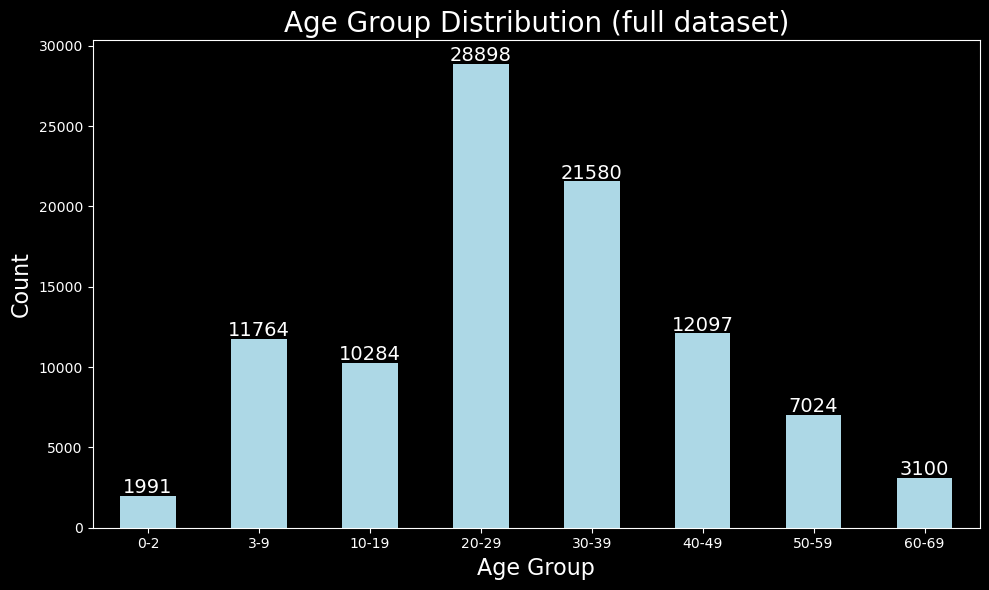

In [ ]:
# Count frequency of 'age group'
age_count = all_labels['age'].value_counts().sort_index()

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))
age_count.plot(kind='bar', ax=ax, rot=0, color='lightblue')
plt.xlabel('Age Group', size=16)
plt.ylabel('Count', size=16)

# Count frequency of 'age group'
labels = [key for key, _ in sorted(
    age_mapping.items(), key=lambda item: item[1])]
# Ensure the number of labels matches the number of ticks
ax.set_xticklabels(labels[:len(age_count)])
plt.title('Age Group Distribution (full dataset)', size=20)
plt.tight_layout()

# show values on each bar
for i, count in enumerate(age_count):
    ax.text(i, count + 500, str(count), ha='center', va='center', size=14)
# plt.savefig('age_dist_all.png')


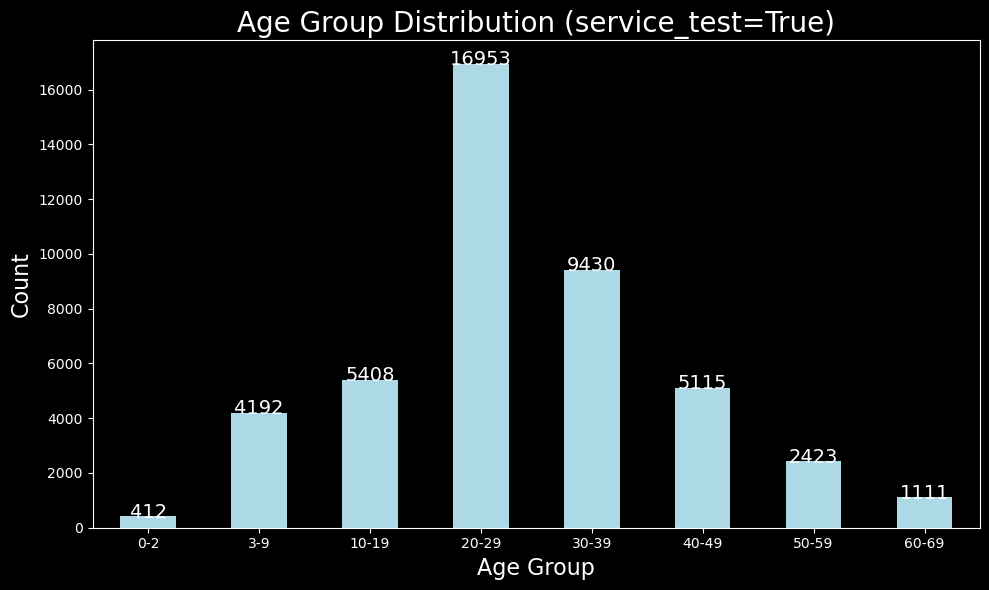

In [ ]:
# Count frequency of 'age group'
age_count = balanced_labels['age'].value_counts().sort_index()

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))
age_count.plot(kind='bar', ax=ax, rot=0, color='lightblue')
plt.xlabel('Age Group', size=16)
plt.ylabel('Count', size=16)

# Count frequency of 'age group'
labels = [key for key, _ in sorted(
    age_mapping.items(), key=lambda item: item[1])]
# Ensure the number of labels matches the number of ticks
ax.set_xticklabels(labels[:len(age_count)])
plt.title('Age Group Distribution (service_test=True)', size=20)
plt.tight_layout()

# show values on each bar
for i, count in enumerate(age_count):
    ax.text(i, count + 500, str(count), ha='center', va='top', size=14)
plt.savefig('age_dist_st.png')


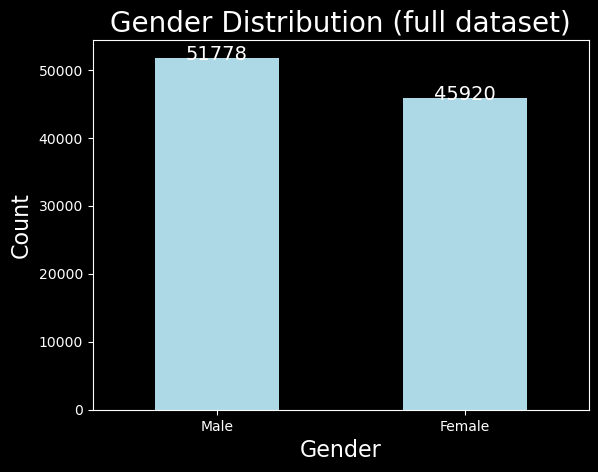

In [ ]:
# Count frequency of 'gender'
all_labels['gender'].value_counts()

# Plot the histogram
all_labels['gender'].value_counts().plot(kind='bar', color='lightblue', rot=0)
plt.xlabel('Gender', size=16)
plt.ylabel('Count', size=16)
plt.title('Gender Distribution (full dataset)', size=20)

# show values on each bar
for i, count in enumerate(all_labels['gender'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', va='center', size=14)
# plt.savefig('gender_dist_all.png')


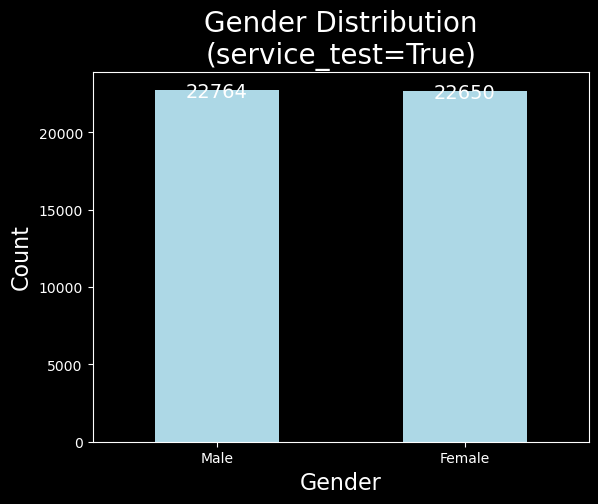

In [ ]:
# Count frequency of 'gender'
balanced_labels['gender'].value_counts()

# Plot the histogram
balanced_labels['gender'].value_counts().plot(
    kind='bar', color='lightblue', rot=0)
plt.xlabel('Gender', size=16)
plt.ylabel('Count', size=16)
plt.title('Gender Distribution\n(service_test=True)', size=20)

# show values on each bar
for i, count in enumerate(balanced_labels['gender'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', va='top', size=14)
plt.savefig('gender_dist_st.png')


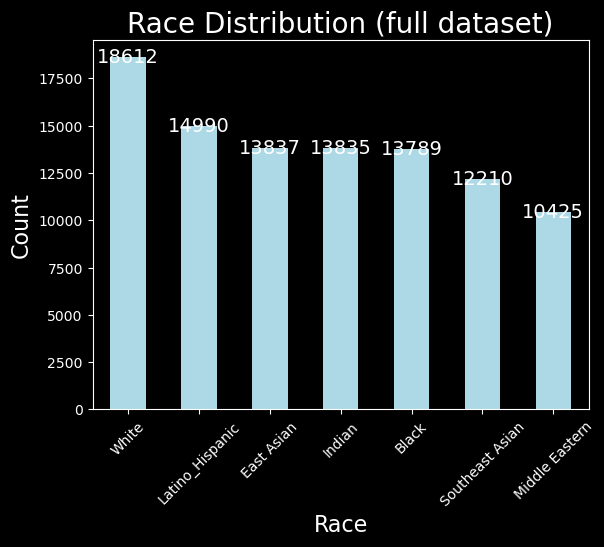

In [ ]:
# count frequency of 'race'
all_labels['race'].value_counts()

# plot the histogram
all_labels['race'].value_counts().plot(kind='bar', color='lightblue', rot=45)
# label x variables
plt.xlabel('Race', size=16)
plt.ylabel('Count', size=16)
plt.title('Race Distribution (full dataset)', size=20)


# show values on each bar
for i, count in enumerate(all_labels['race'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', va='top', size=14)
plt.savefig('race_dist_all.png')


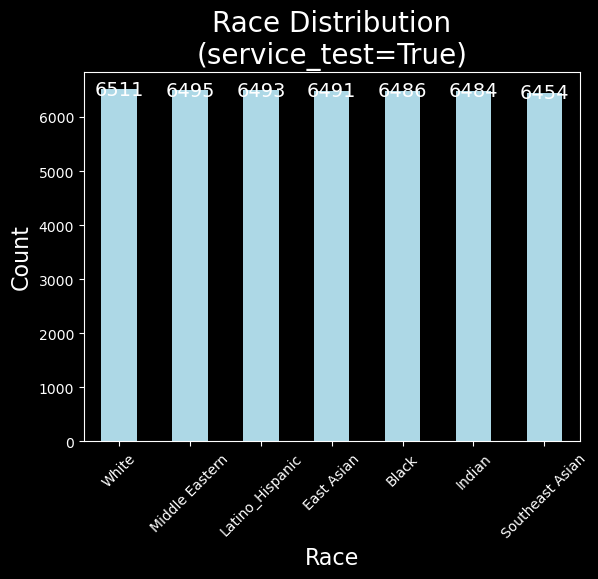

In [ ]:
# count frequency of 'race'
balanced_labels['race'].value_counts()

# plot the histogram
balanced_labels['race'].value_counts().plot(
    kind='bar', color='lightblue', rot=45)
# label x variables
plt.xlabel('Race', size=16)
plt.ylabel('Count', size=16)
plt.title('Race Distribution\n(service_test=True)', size=20)


# show values on each bar
for i, count in enumerate(balanced_labels['race'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='center', size=14)
# plt.savefig('race_dist_st.png')


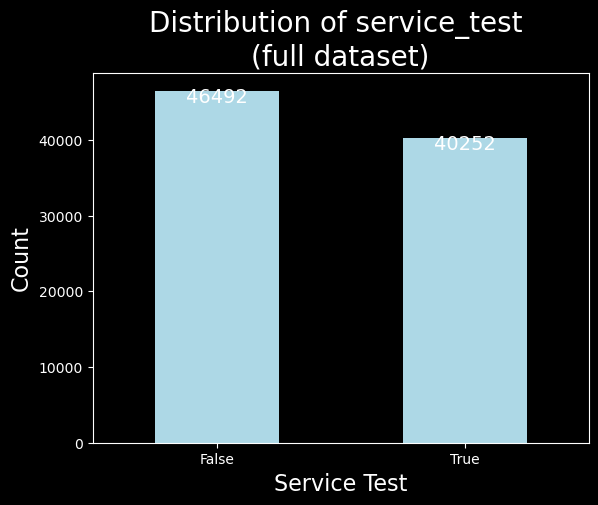

In [ ]:
# count frequency of 'service_test'
train_ds['service_test'].value_counts()

# plot the histogram
train_ds['service_test'].value_counts().plot(
    kind='bar', color='lightblue', rot=0)
# label x variables
plt.xlabel('Service Test', size=16)
plt.ylabel('Count', size=16)
plt.title('Distribution of service_test \n(full dataset)', size=20)

# show values on each bar
for i, count in enumerate(train_ds['service_test'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', va='top', size=14)
# plt.savefig('service_test_dist_all.png')


In [ ]:
all_minus_file = all_labels.drop(columns=['file', 'service_test'])
display(all_minus_file.groupby('age').gender.value_counts().to_frame().unstack())
display(all_minus_file.groupby('age').race.value_counts().to_frame().unstack())


count       
gender Female   Male
age                 
1.0       768   1223
2.0      5254   6510
3.0      5629   4655
4.0     16095  12803
5.0      9438  12142
6.0      4591   7506
7.0      2494   4530
8.0      1154   1946

count                                                                   \
race Black East Asian Indian Latino_Hispanic Middle Eastern Southeast Asian   
age                                                                           
1.0    304        457    187             208            144             248   
2.0   2328       1956   1713            1767            837            1730   
3.0   1721       1321   1715            1824            820            1568   
4.0   3574       5414   3460            3961           2647            3980   
5.0   2956       2640   3119            3272           2697            2277   
6.0   1647       1066   1834            2218           1713            1185   
7.0    856        582   1114            1255            942             691   
8.0    311        300    501             400            491             346   

            
race White  
age         
1.0    443  
2.0   1433  
3.0   1315  
4.0   5862  
5.0   4619  
6.0   2434  
7.0   1584  
8.0    751

In [ ]:
balanced_minus_file = balanced_labels.drop(columns=['file', 'service_test'])
display(balanced_minus_file.groupby(
    'age').gender.value_counts().to_frame().unstack())
display(balanced_minus_file.groupby(
    'age').race.value_counts().to_frame().unstack())


count      
gender Female  Male
age                
1.0       202   210
2.0      2085  2107
3.0      2719  2689
4.0      8427  8526
5.0      4701  4729
6.0      2566  2549
7.0      1221  1202
8.0       509   602

count                                                                   \
race Black East Asian Indian Latino_Hispanic Middle Eastern Southeast Asian   
age                                                                           
1.0     62         57     56              59             60              58   
2.0    593        599    605             603            600             599   
3.0    756        776    778             774            773             782   
4.0   2435       2422   2416            2428           2416            2395   
5.0   1342       1352   1351            1345           1349            1346   
6.0    733        734    728             732            728             726   
7.0    347        338    341             342            351             341   
8.0    175        157    150             169            163             130   

            
race White  
age         
1.0     60  
2.0    593  
3.0    769  
4.0   2441  
5.0   1345  
6.0    734  
7.0    363  
8.0    167

<Axes: xlabel='age'>

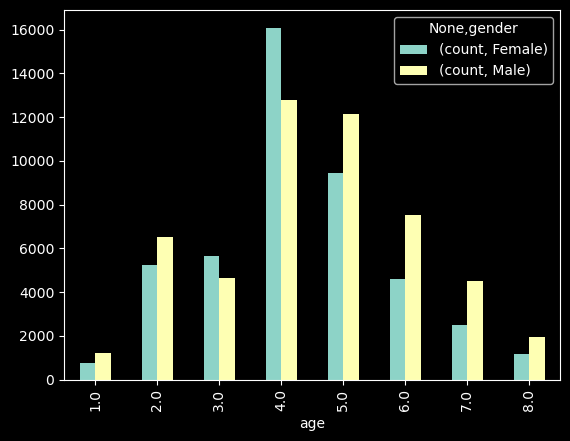

In [ ]:
all_minus_file.groupby('age').gender.value_counts(
).to_frame().unstack().plot(kind='bar')


<Axes: xlabel='age'>

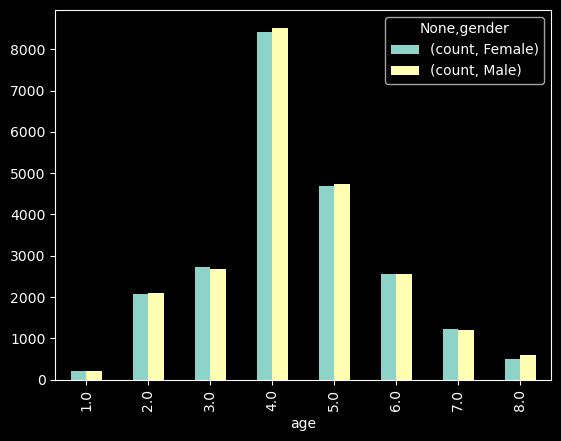

In [ ]:
balanced_minus_file.groupby('age').gender.value_counts(
).to_frame().unstack().plot(kind='bar')


Text(0.5, 1.0, 'Distribution of races across age groups (full dataset)')

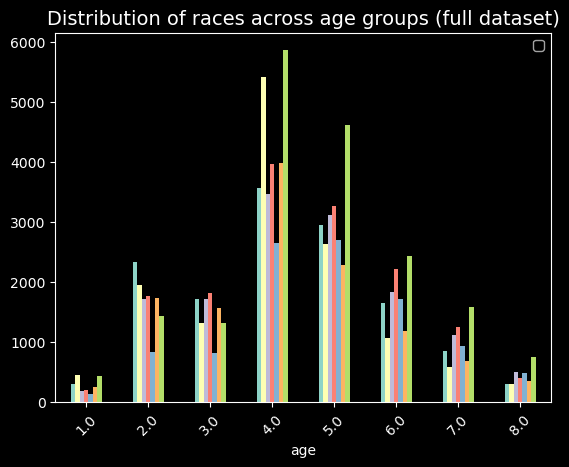

In [ ]:
all_minus_file.groupby('age').race.value_counts(
).to_frame().unstack().plot(kind='bar', rot=45)
plt.legend('')
plt.title('Distribution of races across age groups (full dataset)', size=14)


Text(0.5, 1.0, 'Distribution of races across age groups\n(service_test=True)')

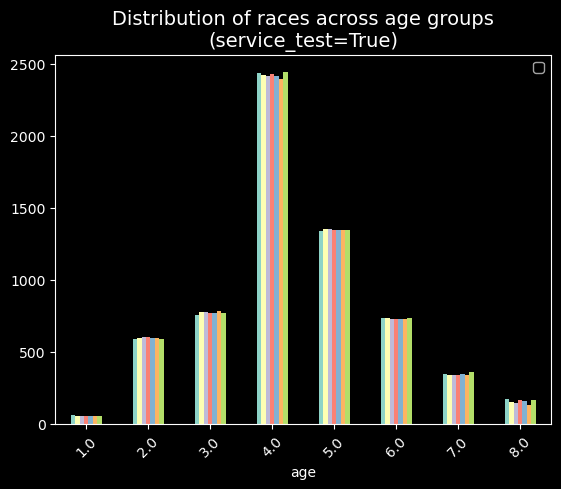

In [ ]:
balanced_minus_file.groupby('age').race.value_counts(
).to_frame().unstack().plot(kind='bar', rot=45)
plt.legend('')
plt.title('Distribution of races across age groups\n(service_test=True)', size=14)


Text(0.5, 1.0, 'Distribution of gender across race groups (full dataset)')

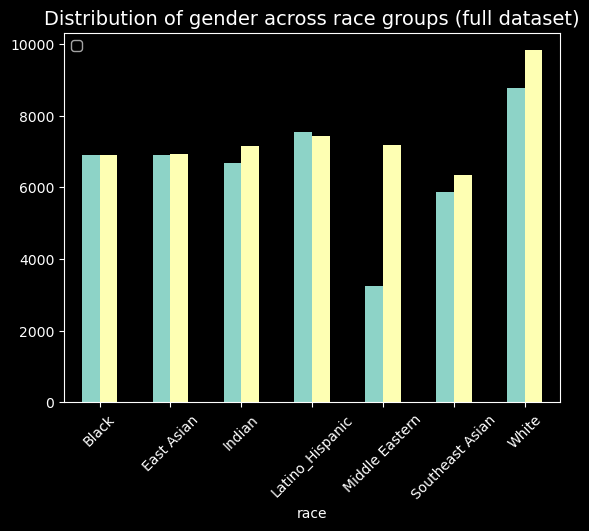

In [ ]:
all_minus_file.groupby('race').gender.value_counts(
).to_frame().unstack().plot(kind='bar', rot=45)
plt.legend('')
plt.title('Distribution of gender across race groups (full dataset)', size=14)


Text(0.5, 1.0, 'Distribution of gender across race groups\n(service_test=True)')

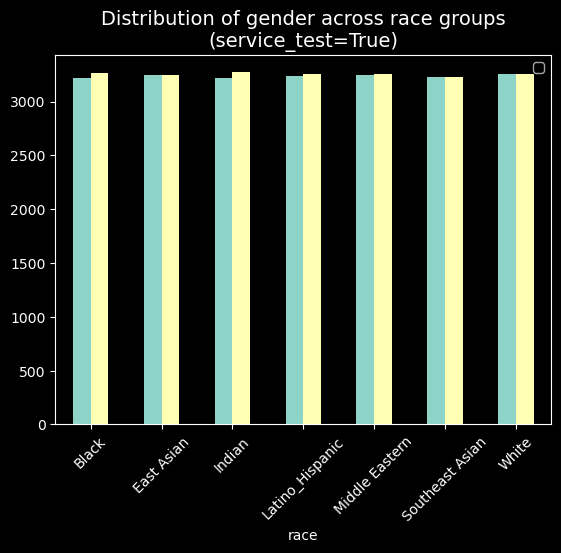

In [ ]:
balanced_minus_file.groupby('race').gender.value_counts(
).to_frame().unstack().plot(kind='bar', rot=45)
plt.legend('')
plt.title('Distribution of gender across race groups\n(service_test=True)', size=14)


### Distribution Comparison 

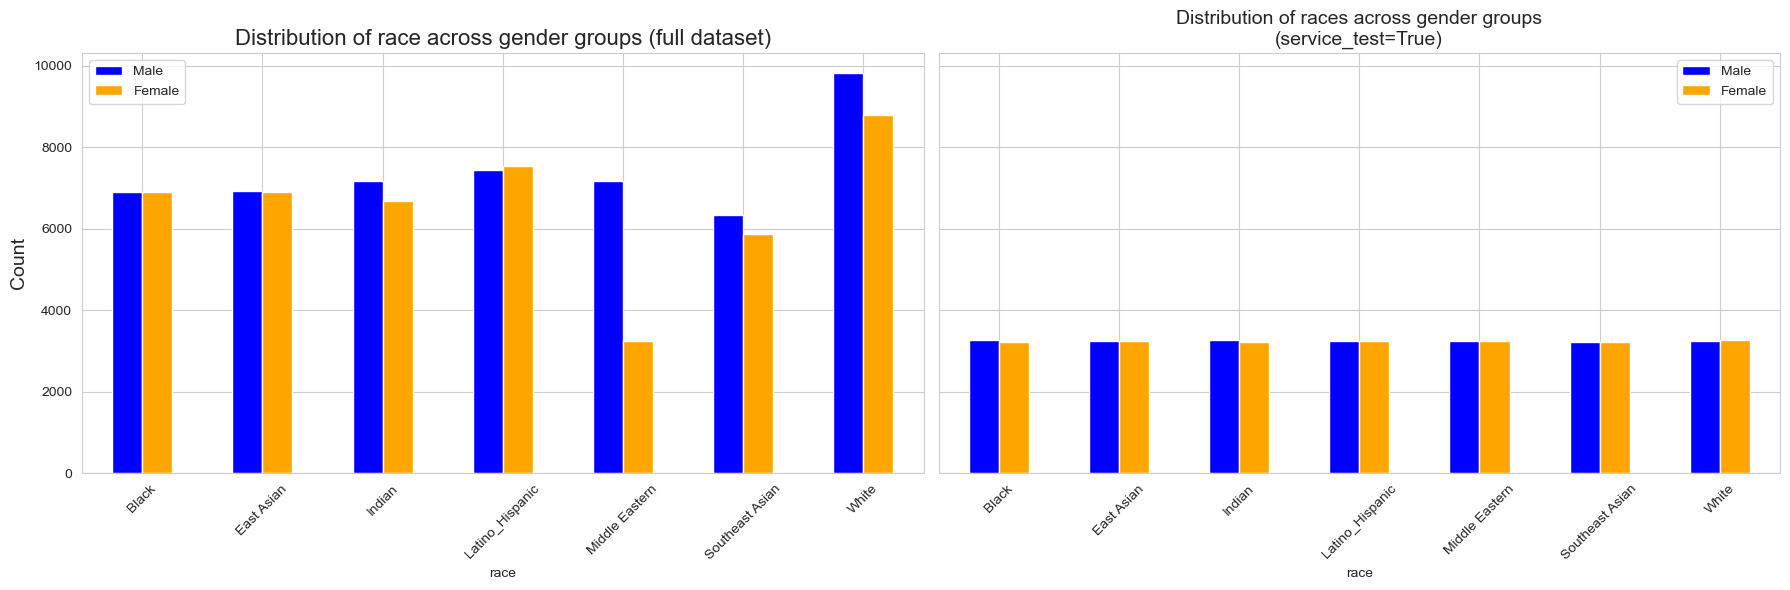

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Define color mapping for gender
gender_colors = {'Male': 'blue', 'Female': 'orange'}

# Plot for all_minus_file
all_gender_counts = all_minus_file.groupby(
    'race').gender.value_counts().unstack()
all_gender_counts[['Male', 'Female']].plot(
    kind='bar', rot=45, ax=axes[0], color=[gender_colors['Male'], gender_colors['Female']])
axes[0].legend(['Male', 'Female'])
axes[0].set_ylabel('Count', size=14)
axes[0].set_title(
    'Distribution of race across gender groups (full dataset)', size=16)

# Plot for balanced_minus_file
balanced_gender_counts = balanced_minus_file.groupby(
    'race').gender.value_counts().unstack()
balanced_gender_counts[['Male', 'Female']].plot(
    kind='bar', rot=45, ax=axes[1], color=[gender_colors['Male'], gender_colors['Female']])
axes[1].legend(['Male', 'Female'])
axes[1].set_ylabel('Count', size=14)
axes[1].set_title(
    'Distribution of races across gender groups\n(service_test=True)', size=14)

plt.tight_layout()
sns.set_style("whitegrid")
plt.show()


In [ ]:
balanced_minus_file = balanced_labels.drop(columns=['file', 'service_test'])
display(balanced_minus_file.groupby(
    'age').gender.value_counts().to_frame().unstack())
display(balanced_minus_file.groupby(
    'age').race.value_counts().to_frame().unstack())


count      
gender Female  Male
age                
1.0       202   210
2.0      2085  2107
3.0      2719  2689
4.0      8427  8526
5.0      4701  4729
6.0      2566  2549
7.0      1221  1202
8.0       509   602

count                                                                   \
race Black East Asian Indian Latino_Hispanic Middle Eastern Southeast Asian   
age                                                                           
1.0     62         57     56              59             60              58   
2.0    593        599    605             603            600             599   
3.0    756        776    778             774            773             782   
4.0   2435       2422   2416            2428           2416            2395   
5.0   1342       1352   1351            1345           1349            1346   
6.0    733        734    728             732            728             726   
7.0    347        338    341             342            351             341   
8.0    175        157    150             169            163             130   

            
race White  
age         
1.0     60  
2.0    593  
3.0    769  
4.0   2441  
5.0   1345  
6.0    734  
7.0    363  
8.0    167

C:\Users\n_oha\AppData\Local\Temp\ipykernel_12352\2529780838.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(labels[:len(train_ds['age'].unique())])


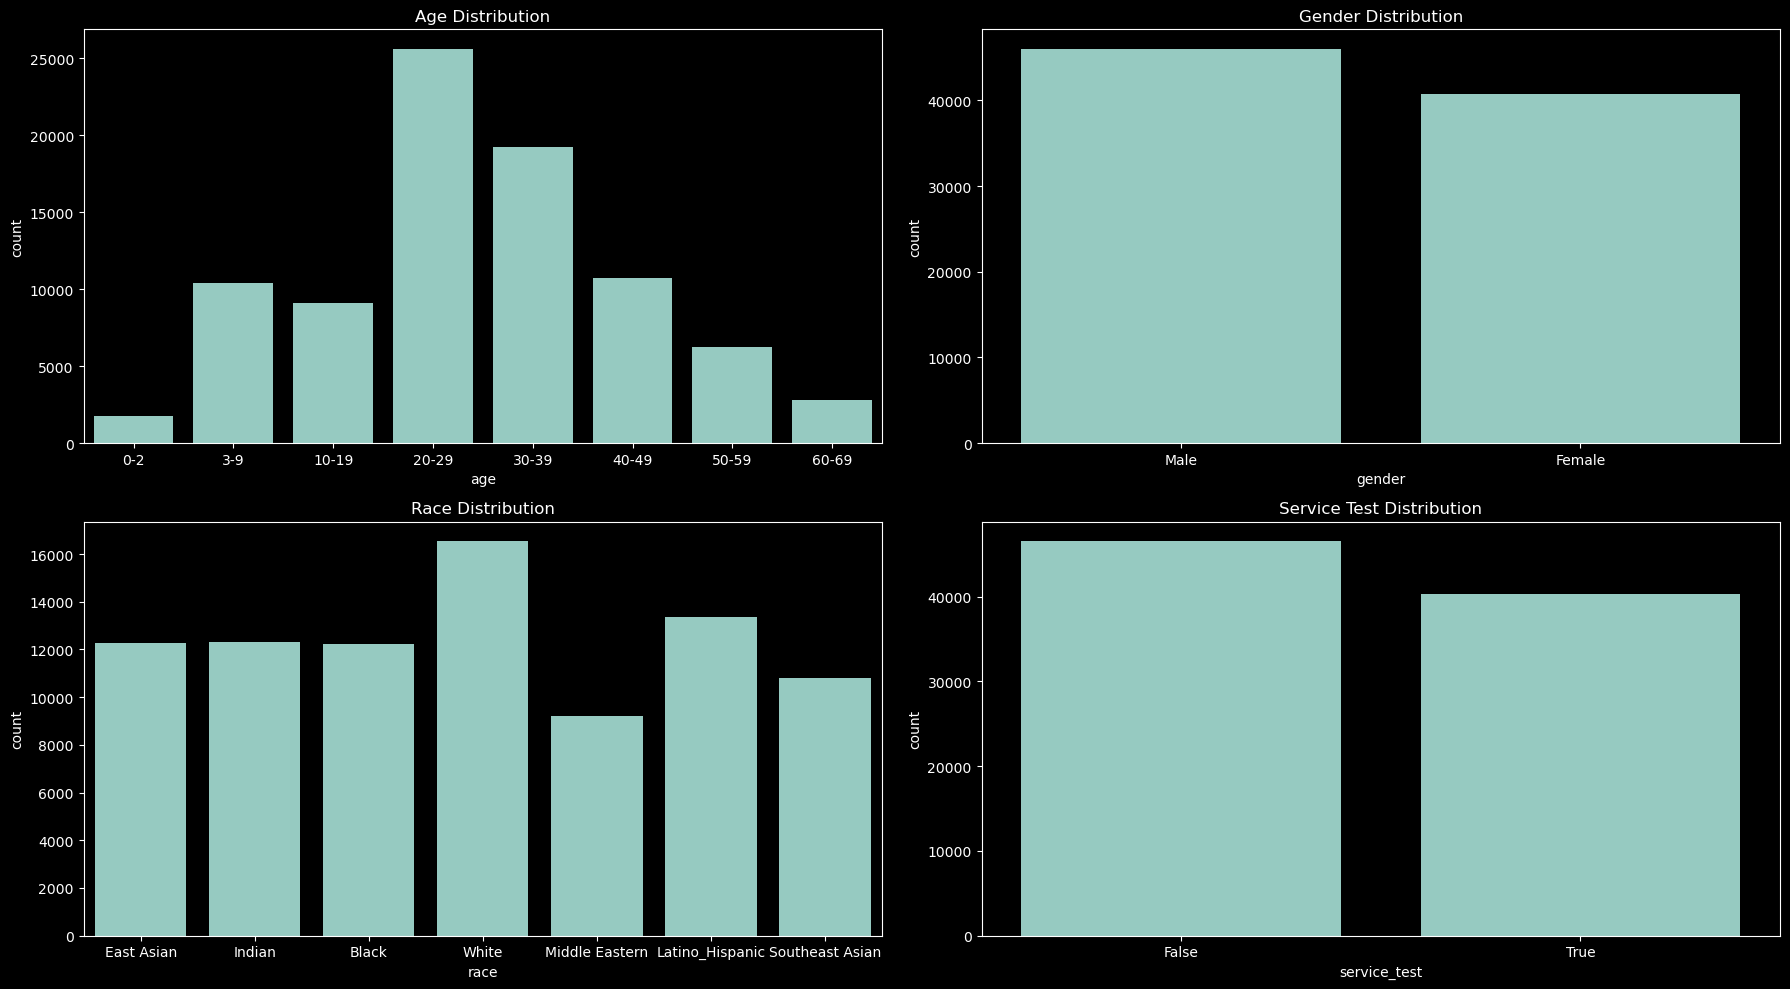

In [ ]:
# Distribution of the Classes (age, gender, race, service_test)
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(ax=axes[0, 0], x='age', data=train_ds)
labels = [key for key, _ in sorted(
    age_mapping.items(), key=lambda item: item[1])]
axes[0, 0].set_xticklabels(labels[:len(train_ds['age'].unique())])
axes[0, 0].set_title('Age Distribution')

sns.countplot(ax=axes[0, 1], x='gender', data=train_ds)
axes[0, 1].set_title('Gender Distribution')

sns.countplot(ax=axes[1, 0], x='race', data=train_ds)
axes[1, 0].set_title('Race Distribution')

sns.countplot(ax=axes[1, 1], x='service_test', data=train_ds)
axes[1, 1].set_title('Service Test Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# Correlation between race and service_test
pd.crosstab(train_ds.race, train_ds.service_test)


service_test,False,True
race,,
Black,6479,5754
East Asian,6515,5772
Indian,6565,5754
Latino_Hispanic,7611,5756
Middle Eastern,3502,5714
Southeast Asian,5070,5725
White,10750,5777


In [ ]:
# Correlation between age and service_test
pd.crosstab(train_ds['age'], train_ds['service_test'])


service_test,False,True
age,,
1.0,1414,378
2.0,6721,3687
3.0,4326,4777
4.0,10582,15016
5.0,10852,8398
6.0,6208,4536
7.0,4095,2133
8.0,1775,1004


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
all_labels.loc[:, 'gender'] = le.fit_transform(all_labels['gender'])
all_labels.loc[:, 'race'] = le.fit_transform(all_labels['race'])
balanced_labels.loc[:, 'gender'] = le.fit_transform(balanced_labels['gender'])
balanced_labels.loc[:, 'race'] = le.fit_transform(balanced_labels['race'])


# Calculate correlation
display(all_labels[['age', 'gender', 'race']].corr().round(4))
display(balanced_labels[['age', 'gender', 'race']].corr().round(4))


,age,gender,race
age,1.0000,0.0819,0.0878
gender,0.0819,1.0000,0.0348
race,0.0878,0.0348,1.0000


,age,gender,race
age,1.0000,0.0032,-0.0010
gender,0.0032,1.0000,-0.0019
race,-0.0010,-0.0019,1.0000


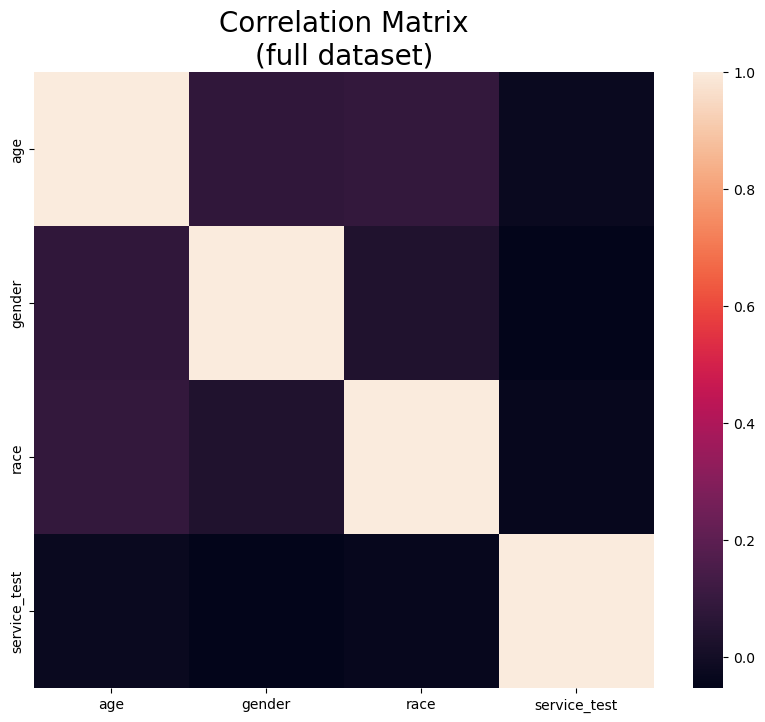

In [ ]:
# correlation

f, ax = plt.subplots(figsize=(10, 8))

# Entire DataFrame
all_labels_minus_file = all_labels.drop(columns='file')
corr = all_labels_minus_file.corr()
sns.heatmap(corr, annot_kws={'size': 20}, ax=ax)
ax.set_title(
    "Correlation Matrix\n(full dataset)", fontsize=20)

# plt.savefig('corr_matrix_all.png')


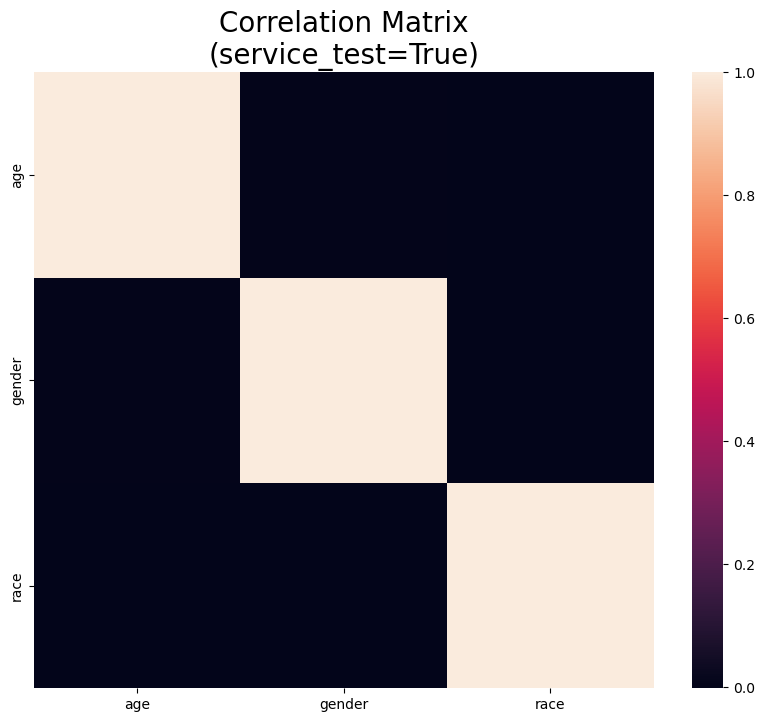

In [ ]:
# correlation

f, ax = plt.subplots(figsize=(10, 8))

# Entire DataFrame
balanced_labels_minus_file = balanced_labels.drop(
    columns=['file', 'service_test'])
corr = balanced_labels_minus_file.corr()
sns.heatmap(corr, annot_kws={'size': 20}, ax=ax)
ax.set_title(
    "Correlation Matrix\n(service_test=True)", fontsize=20)

plt.savefig('corr_matrix_st.png')


### One-Hot Encoding

In [ ]:
# one-hot encoding of categorical variables
train_ds = pd.get_dummies(train_ds)

print('Training Features shape: ', train_ds.shape)


Training Features shape:  (86744, 4)


In [ ]:
train_ds.head(5)


,age,gender,race,service_test
0,7.0,1,1,True
1,5.0,0,2,False
2,2.0,0,0,False
3,4.0,0,2,True
4,4.0,0,2,True


================================
#### Load validation data set

In [ ]:
# Load the validation label dataset
file_id = '1wOdja-ezstMEp81tX1a-EYkFebev4h7D'
url = f'https://drive.google.com/uc?export=download&id={file_id}'
response = requests.get(url)
val_ds = pd.read_csv(io.StringIO(response.text))


In [ ]:
val_ds.info()


In [ ]:
val_ds.head(5)


In [ ]:

col_names = ['file', 'age', 'gender', 'race', 'service_test']

for col in col_names:

    print(val_ds[col].value_counts())


================================
#### Images

In [ ]:
# Load image dataset from url
def load_image_dataset(url):
    response = requests.get(url)
    return pd.read_csv(io.StringIO(response.jpg))


image_ds = load_image_dataset(
    'https://drive.google.com/uc?export=download&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86')


AttributeError: 'Response' object has no attribute 'jpg'

In [ ]:
image_ds


In [ ]:
from zipfile import ZipFile


In [ ]:
with ZipFile('fairface-img-margin025-trainval.zip', 'r') as zip_ref:
    my_zip = zip_ref.printdir()


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
my_zip
